### Data Preprocessing and Model Development

#### Code - Shipping ETA

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Spire_dataset.csv")

In [ ]:
data.head()

,created_at,timestamp,static_updated_at,position_updated_at,mmsi,latitude,longitude,speed,course,heading,...,call_sign,flag,draught,ship_and_cargo_type,length,width,eta,destination,status,collection_type
0,2022-10-10 20:24:50.457193 UTC,2022-10-10 20:18:51.85 UTC,2022-10-08 15:23:32 UTC,2022-10-10 20:18:51.85 UTC,538003294,12.834630,113.967570,16.8,36.0,33.0,...,V7PV2,MH,12.1,84.0,345.0,54.0,2022-10-15 21:00:00 UTC,KR INC,15.0,dynamic
1,2022-10-10 21:02:05.635431 UTC,2022-10-10 20:32:20.033546 UTC,2022-10-08 15:23:32 UTC,2022-10-10 20:32:20.033546 UTC,538003294,12.885000,114.005000,17.0,36.0,33.0,...,V7PV2,MH,12.1,84.0,345.0,54.0,2022-10-15 21:00:00 UTC,KR INC,0.0,satellite
2,2022-10-10 02:24:01.747894 UTC,2022-10-10 02:20:52.53 UTC,2022-10-09 04:59:05.34 UTC,2022-10-10 02:20:52.53 UTC,447143000,9.706962,110.854292,13.4,34.0,30.0,...,9KBQ,KW,20.0,80.0,333.0,60.0,2022-10-15 02:00:00 UTC,KWMEA>CNNGB,15.0,dynamic
3,2022-10-10 04:59:49.69183 UTC,2022-10-10 04:48:44.7 UTC,2022-10-09 07:38:45 UTC,2022-10-10 04:48:44.7 UTC,538006170,20.349100,118.828367,12.9,184.0,183.0,...,V7KJ3,MH,6.4,70.0,185.0,32.0,2022-10-13 15:00:00 UTC,RIO TUBA,15.0,dynamic
4,2022-10-10 19:24:41.182089 UTC,2022-10-10 19:18:17.46 UTC,2022-10-09 18:17:10.94 UTC,2022-10-10 19:18:17.46 UTC,636017930,14.980682,114.777818,11.8,37.0,40.0,...,D5NJ9,LR,12.6,80.0,183.0,32.0,2022-10-15 17:00:00 UTC,KR USN,15.0,dynamic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71315 entries, 0 to 71314
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           71315 non-null  object 
 1   timestamp            71315 non-null  object 
 2   static_updated_at    68836 non-null  object 
 3   position_updated_at  71303 non-null  object 
 4   mmsi                 71315 non-null  int64  
 5   latitude             71315 non-null  float64
 6   longitude            71315 non-null  float64
 7   speed                71303 non-null  float64
 8   course               71303 non-null  float64
 9   heading              71283 non-null  float64
 10  imo                  59695 non-null  float64
 11  name                 68859 non-null  object 
 12  call_sign            59012 non-null  object 
 13  flag                 71015 non-null  object 
 14  draught              59695 non-null  float64
 15  ship_and_cargo_type  68877 non-null 

In [ ]:
data.describe()

,mmsi,latitude,longitude,speed,course,heading,imo,draught,ship_and_cargo_type,length,width,status
count,7.131500e+04,71315.000000,71315.000000,71303.000000,71303.000000,71283.000000,5.969500e+04,59695.000000,68877.000000,68877.000000,68877.000000,60861.000000
mean,4.675306e+08,13.860597,114.201153,9.196233,161.574621,214.805395,9.737417e+06,10.023024,61.052383,182.544623,29.344803,12.166083
std,1.279676e+08,4.580298,4.294114,5.517584,107.387728,170.978967,1.851294e+07,4.441094,28.894278,110.423402,17.618045,5.804108
min,1.911799e+08,4.718367,108.367217,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.703640e+08,9.574128,109.726044,4.700000,44.000000,45.000000,9.324095e+06,7.300000,70.000000,105.000000,18.000000,15.000000
50%,4.777339e+08,14.111140,113.744457,10.700000,181.000000,203.000000,9.510319e+06,9.300000,70.000000,190.000000,32.000000,15.000000
75%,5.741282e+08,16.925812,119.296732,12.800000,223.000000,336.000000,9.710593e+06,12.400000,79.000000,280.000000,44.000000,15.000000
max,9.778422e+08,22.855650,120.116588,102.300000,360.000000,511.000000,9.421116e+08,21.500000,216.000000,528.000000,73.000000,15.000000


In [ ]:
data.isnull().sum()

,0
created_at,0
timestamp,0
static_updated_at,2479
position_updated_at,12
mmsi,0
latitude,0
longitude,0
speed,12
course,12
heading,32


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(56569, 22)

In [ ]:
data.duplicated().sum()

0

In [ ]:
unique_values = data.nunique()
print(unique_values)

created_at             51922
timestamp              54978
static_updated_at       2347
position_updated_at    53968
mmsi                    1247
latitude               53415
longitude              52682
speed                    227
course                  1913
heading                  361
imo                     1219
name                    1267
call_sign               1246
flag                      54
draught                  174
ship_and_cargo_type       38
length                   247
width                     60
eta                      550
destination              873
status                     9
collection_type            3
dtype: int64


In [ ]:
unique_conditions = data['destination'].unique()
for i in range(len(unique_conditions)):
    print(f'{i+1}. {unique_conditions[i]}')

1. KR INC
2. KWMEA>CNNGB
3. RIO TUBA
4. KR USN
5. KENDAWANGAN
6. BOTOLAN
7. KIKEH
8. SGP PEBGC
9. BEILUN
10. CHSHK-SGSIN
11. VN PHU
12. MUARA BERAU
13. TH MAT
14. TW KHH
15. SRIRACHA.THAILAND
16. LIANYUNGANG
17. IDJKT
18. TMK JP
19. CN XSA
20. RIZHAO, CHINA
21. JP NGO
22. TPL
23. CN QINGDAO
24. DAMPIER
25. CN TNJ
26. MYPKN
27. CNHUH
28. TWKHH
29. CAOFEIDIAN,CHINA
30. MACHONG/CHINA
31. YANGXI
32. SUBIC BAY
33. RIZHAO CHINA
34. TIANJIN
35. SINGAPORE
36. BIENDONG OILFIELD
37. BUNATI,ID
38. PGPOM
39. JP SGM
40. CN LUOYU
41. KEMEN CHINA.
42. PAN YU OILFIED
43. DAFENG
44. JP KNE
45. VUNG TAU  DA NANG
46. CN_DJK
47. ZHA;CN^:^
48. SIN PEBGA
49. >JP YKK
50. JP MII
51. BEILUN CHINA
52. JP YOK
53. CHANGXINDAO CN
54. JP ISG>PH MNL
55. FOR ORDERS
56. TIANJIN,CHINA
57. PGBG SIN
58. ANPING TAIWAN
59. SINGAPORE_PEBGB
60. BANGKOK
61. CHIBA
62. CN NTG
63. RIZHA0 CHINA
64. CNTXG
65. LANSHAN
66. DALIAN
67. JINGTANG
68. CNSHK
69. CN SDG
70. CNNSH
71. CN HUILAI
72. CNQDG
73. MY TPP
74. CNIWN > SGSIN
75. QIN

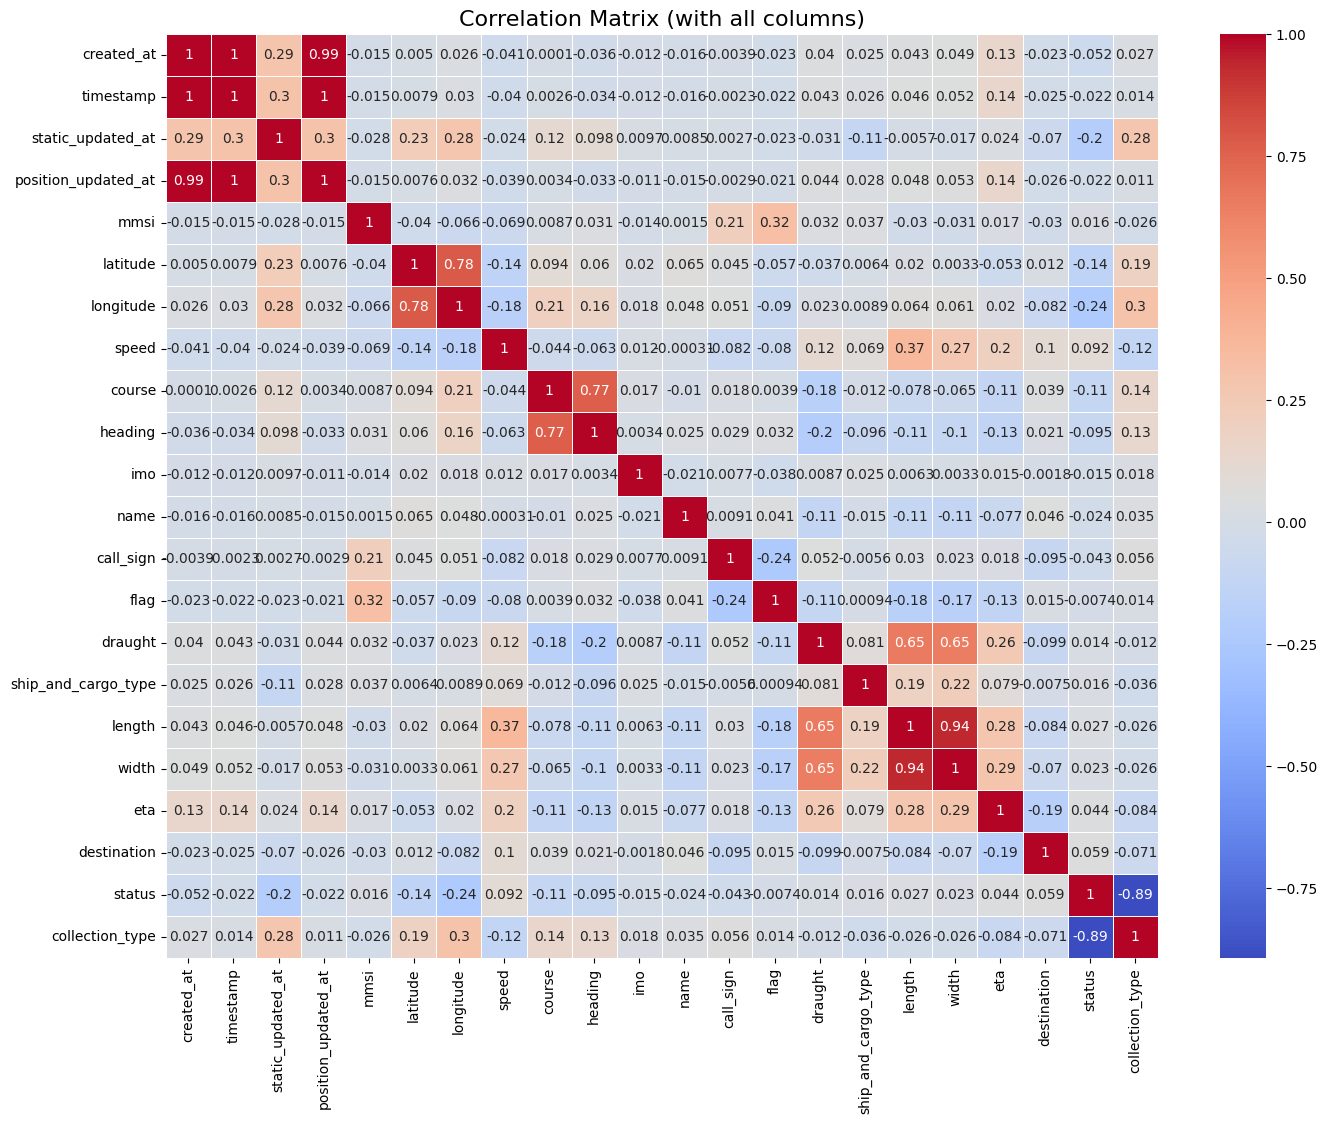

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_encoded = data.copy()

from sklearn.preprocessing import LabelEncoder

for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column].astype(str))

numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64'])

clean_numeric_data = numeric_columns.dropna()

correlation_matrix = clean_numeric_data.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix (with all columns)', fontsize=16)

plt.show()

In [ ]:
data.columns

Index(['created_at', 'timestamp', 'static_updated_at', 'position_updated_at',
       'mmsi', 'latitude', 'longitude', 'speed', 'course', 'heading', 'imo',
       'name', 'call_sign', 'flag', 'draught', 'ship_and_cargo_type', 'length',
       'width', 'eta', 'destination', 'status', 'collection_type'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import xgboost as xgb

warnings.filterwarnings('ignore')

def preprocess_data(data):
    data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce', utc=True)
    data['static_updated_at'] = pd.to_datetime(data['static_updated_at'], errors='coerce')
    data['position_updated_at'] = pd.to_datetime(data['position_updated_at'], errors='coerce')

    data.loc[:, 'created_at_hour'] = data['created_at'].dt.hour
    data.loc[:, 'created_at_day'] = data['created_at'].dt.day
    data.loc[:, 'created_at_month'] = data['created_at'].dt.month

    data.loc[:, 'timestamp_hour'] = data['timestamp'].dt.hour
    data.loc[:, 'timestamp_day'] = data['timestamp'].dt.day
    data.loc[:, 'timestamp_month'] = data['timestamp'].dt.month

    y = pd.to_datetime(data['eta'], errors='coerce').view(np.int64) / 10**9
    y = y.dropna()

    X = data[['latitude', 'longitude', 'speed', 'course', 'heading', 'draught',
              'length', 'width', 'created_at_hour', 'created_at_day', 'created_at_month',
              'timestamp_hour', 'timestamp_day', 'timestamp_month', 'ship_and_cargo_type',
              'destination', 'status', 'collection_type']]

    X = pd.get_dummies(X, drop_first=True)

    X_clean, y_clean = X.dropna(), y.loc[X.dropna().index]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clean)

    selector = SelectKBest(score_func=f_regression, k='all')
    X_selected = selector.fit_transform(X_scaled, y_clean)

    return X_selected, y_clean

def train_evaluate_lr(X_train, y_train, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def train_evaluate_dt(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def train_evaluate_rf(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def train_evaluate_xgb(X_train, y_train, X_test, y_test):
    xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def train_evaluate_lstm(X_train, y_train, X_test, y_test):
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    lstm_model = Sequential([
        LSTM(64, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred_lstm = lstm_model.predict(X_test_lstm)

    r2_lstm = r2_score(y_test, y_pred_lstm)
    return r2_lstm

In [ ]:
X, y = preprocess_data(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}
results['Linear Regression'] = train_evaluate_lr(X_train, y_train, X_test, y_test)
results['Decision Tree'] = train_evaluate_dt(X_train, y_train, X_test, y_test)
# results['Random Forest'] = train_evaluate_rf(X_train, y_train, X_test, y_test)
# results['XGBoost'] = train_evaluate_xgb(X_train, y_train, X_test, y_test)
# results['LSTM'] = train_evaluate_lstm(X_train, y_train, X_test, y_test)

print(results)

{'Linear Regression': -3.3102692602962483e+25, 'Decision Tree': 0.9760204311510617}


In [ ]:
results['LSTM'] = train_evaluate_lstm(X_train, y_train, X_test, y_test)
print(results)

290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
{'Linear Regression': -3.3102692602962483e+25, 'Decision Tree': 0.9760204311510617, 'LSTM': -1456173.084277256}


#### Code - Route Optimization

In [ ]:
from IPython.display import display, HTML

routes = """
<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            background-color: #f4f4f9;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            color: #333;
            margin: 20px;
        }
        h2 {
            color: #1e90ff;
            font-size: 24px;
            border-bottom: 2px solid #1e90ff;
            padding-bottom: 10px;
        }
        p {
            font-size: 18px;
            line-height: 1.6;
            margin: 10px 0;
        }
        strong {
            color: #007bff;
            font-size: 20px;
        }
        ul {
            list-style-type: none;
            padding-left: 0;
            margin: 10px 0;
        }
        li {
            background-color: #ffffff;
            border: 1px solid #e1e1e1;
            border-radius: 5px;
            padding: 10px;
            margin-bottom: 5px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
        }
        .container {
            max-width: 800px;
            margin: auto;
            padding: 20px;
            background-color: #ffffff;
            border-radius: 8px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Shipping Routes</h2>

        <p><strong>Between China and Singapore:</strong></p>
        <ul>
            <li>China → Node2 → Node3 → Singapore</li>
            <li>China → Node1 → Node4 → Singapore</li>
        </ul>

        <p><strong>Between Singapore and India:</strong></p>
        <ul>
            <li>Singapore → Node5 → India</li>
        </ul>

        <p><strong>Between India and UAE:</strong></p>
        <ul>
            <li>India → Node6 → Node7 → Node8 → UAE</li>
            <li>India → Node7 → Node8 → UAE</li>
        </ul>

        <p><strong>Between UAE and Israel:</strong></p>
        <ul>
            <li>UAE → Israel</li>
        </ul>

        <p><strong>Between Israel and Greece:</strong></p>
        <ul>
            <li>Israel → Node9 → Greece</li>
            <li>Israel → Node10 → Greece</li>
        </ul>
    </div>
</body>
</html>
"""

display(HTML(routes))

In [ ]:
import plotly.graph_objects as go

locations = {
    'China': (30.6266, 122.0634),
    'Node1': (25.0, 120.0),  # South China Sea
    'Node2': (25.0, 124.0),  # Between China and Node1
    'Node3': (13.0, 116.0),  # Between Node2 and Singapore
    'Node4': (10.0, 110.0),  # Bay of Bengal
    'Singapore': (1.2640, 103.8400),
    'Node5': (8.0, 95.0),    # Near the Arabian Sea
    'India': (10.0, 80.0),   # Arabian Sea
    'Node6': (5.0, 83.0),    # Between India and Node5
    'Node7': (5.0, 76.0),    # Central Mediterranean
    'Node8': (22.0, 62.0),   # Near the Gulf of Aqaba
    'UAE': (25.27, 55.28),   # Near the Gulf of Aqaba
    'Road': (22.0, 54.0),    # Road Between UAE and Israel
    'Israel': (32.79, 34.98),# Near the Aegean Sea
    'Node9': (36.0, 28.0),   # Between UAE and Greece
    'Node10': (34.0, 22.0),  # Between UAE and Greece
    'Greece': (37.98, 23.72) # Final destination
}

fig = go.Figure()

for name, coords in locations.items():
    if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece']:
        marker_color = 'red'
    else:
        marker_color = 'blue'

    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[coords[1]],
        lat=[coords[0]],
        mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
        marker=dict(size=10, color=marker_color),
        text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
        textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
        name=name
    ))

routes = [
    # Between China and Singapore
    ('China', 'Node2'),
    ('Node2', 'Node3'),
    ('Node3', 'Singapore'),

    ('China', 'Node1'),
    ('Node1', 'Node4'),
    ('Node4', 'Singapore'),

    # Between Singapore and India
    ('Singapore', 'Node5'),
    ('Node5', 'India'),

    # Between India and UAE
    ('India', 'Node6'),
    ('Node6', 'Node7'),
    ('Node7', 'Node8'),
    ('Node8', 'UAE'),

    ('India', 'Node7'),
    ('Node7', 'Node8'),
    ('Node8', 'UAE'),

    # Between UAE and Israel
    ('UAE', 'Road'),
    ('Road', 'Israel'),

    # Between Israel and Greece
    ('Israel', 'Node9'),
    ('Node9', 'Greece'),

    ('Israel', 'Node10'),
    ('Node10', 'Greece')
]

for start, end in routes:
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[locations[start][1], locations[end][1]],
        lat=[locations[start][0], locations[end][0]],
        mode='lines',
        line=dict(width=2, color='green'),
        name=f'{start} to {end}'
    ))

lons = [coords[1] for coords in locations.values()]
lats = [coords[0] for coords in locations.values()]
bounding_box = {
    'lon': [min(lons) - 10, max(lons) + 10],
    'lat': [min(lats) - 10, max(lats) + 10]
}

fig.update_layout(
    title='Nodes and Routes on Sea Route Network',
    geo=dict(
        scope='world',
        projection=dict(type='mercator'),
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        showcountries=True,
        countrycolor='black',
        showcoastlines=True,
        coastlinecolor='black',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='blue',
        lonaxis=dict(range=bounding_box['lon']),
        lataxis=dict(range=bounding_box['lat'])
    )
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import networkx as nx

locations = {
    'China': (30.6266, 122.0634),
    'Node1': (25.0, 120.0),
    'Node2': (25.0, 124.0),
    'Node3': (13.0, 116.0),
    'Node4': (10.0, 110.0),
    'Singapore': (1.2640, 103.8400),
    'Node5': (8.0, 95.0),
    'India': (10.0, 80.0),
    'Node6': (5.0, 83.0),
    'Node7': (5.0, 76.0),
    'Node8': (22.0, 62.0),
    'UAE': (25.27, 55.28),
    'Road': (22.0, 54.0),
    'Israel': (32.79, 34.98),
    'Node9': (36.0, 28.0),
    'Node10': (34.0, 22.0),
    'Greece': (37.98, 23.72)
}

G = nx.Graph()

for name in locations:
    G.add_node(name, pos=locations[name])

edges = [
    # (start, end, distance, cost, emissions, risk)
    ('China', 'Node2', 1000, 500, 200, 50),
    ('Node2', 'Node3', 1200, 600, 250, 40),
    ('Node3', 'Singapore', 1500, 700, 300, 30),
    ('China', 'Node1', 800, 400, 150, 60),
    ('Node1', 'Node4', 1100, 550, 220, 50),
    ('Node4', 'Singapore', 1300, 650, 270, 45),
    ('Singapore', 'Node5', 600, 300, 120, 70),
    ('Node5', 'India', 900, 450, 180, 60),
    ('India', 'Node6', 800, 400, 160, 65),
    ('Node6', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('India', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('UAE', 'Road', 200, 100, 50, 10),
    ('Road', 'Israel', 1000, 500, 200, 30),
    ('Israel', 'Node9', 800, 400, 160, 25),
    ('Node9', 'Greece', 1000, 500, 200, 20),
    ('Israel', 'Node10', 900, 450, 180, 20),
    ('Node10', 'Greece', 1000, 500, 200, 20)
]

for edge in edges:
    start, end, distance, cost, emissions, risk = edge
    weight = distance + cost + emissions + risk
    G.add_edge(start, end, weight=weight, distance=distance, cost=cost, emissions=emissions, risk=risk)

#  Dijkstra's algorithm
source = 'China'
destination = 'Greece'
shortest_path = nx.dijkstra_path(G, source, destination, weight='weight')
path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))

fig = go.Figure()

for name, coords in locations.items():
    marker_color = 'red' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'blue'
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[coords[1]],
        lat=[coords[0]],
        mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
        marker=dict(size=10, color=marker_color),
        text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
        textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
        name=name
    ))

for start, end in path_edges:
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[locations[start][1], locations[end][1]],
        lat=[locations[start][0], locations[end][0]],
        mode='lines',
        line=dict(width=2, color='green'),
        name=f'{start} to {end}'
    ))



lons = [coords[1] for coords in locations.values()]
lats = [coords[0] for coords in locations.values()]
bounding_box = {
    'lon': [min(lons) - 10, max(lons) + 10],
    'lat': [min(lats) - 10, max(lats) + 10]
}

fig.update_layout(
    title='Optimized Sea Route Network via Dijkstra Algorithm',
    geo=dict(
        scope='world',
        projection=dict(type='mercator'),
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        showcountries=True,
        countrycolor='black',
        showcoastlines=True,
        coastlinecolor='black',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='blue',
        lonaxis=dict(range=bounding_box['lon']),
        lataxis=dict(range=bounding_box['lat'])
    )
)

fig.show()

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go

locations = {
    'China': (30.6266, 122.0634),
    'Node1': (25.0, 120.0),
    'Node2': (25.0, 124.0),
    'Node3': (13.0, 116.0),
    'Node4': (10.0, 110.0),
    'Singapore': (1.2640, 103.8400),
    'Node5': (8.0, 95.0),
    'India': (10.0, 80.0),
    'Node6': (5.0, 83.0),
    'Node7': (5.0, 76.0),
    'Node8': (22.0, 62.0),
    'UAE': (25.27, 55.28),
    'Road': (22.0, 54.0),
    'Israel': (32.79, 34.98),
    'Node9': (36.0, 28.0),
    'Node10': (34.0, 22.0),
    'Greece': (37.98, 23.72)
}

G = nx.Graph()

for name in locations:
    G.add_node(name, pos=locations[name])

edges = [
    ('China', 'Node2', 1000, 500, 200, 50),
    ('Node2', 'Node3', 1200, 600, 250, 40),
    ('Node3', 'Singapore', 1500, 700, 300, 30),
    ('China', 'Node1', 800, 400, 150, 60),
    ('Node1', 'Node4', 1100, 550, 220, 50),
    ('Node4', 'Singapore', 1300, 650, 270, 45),
    ('Singapore', 'Node5', 600, 300, 120, 70),
    ('Node5', 'India', 900, 450, 180, 60),
    ('India', 'Node6', 800, 400, 160, 65),
    ('Node6', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('India', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('UAE', 'Road', 200, 100, 50, 10),
    ('Road', 'Israel', 1000, 500, 200, 30),
    ('Israel', 'Node9', 800, 400, 160, 25),
    ('Node9', 'Greece', 1000, 500, 200, 20),
    ('Israel', 'Node10', 900, 450, 180, 20),
    ('Node10', 'Greece', 1000, 500, 200, 20)
]

for edge in edges:
    start, end, distance, cost, emissions, risk = edge
    weight = distance + cost + emissions + risk  # Adjust the weight formula as needed
    G.add_edge(start, end, weight=weight, distance=distance, cost=cost, emissions=emissions, risk=risk)

gamma = 0.9
alpha = 0.1
epsilon = 0.1
episodes = 1000

# Q-table
states = list(locations.keys())
actions = [(start, end) for start, end, _, _, _, _ in edges]
Q = {state: {action: 0 for action in actions if action[0] == state} for state in states}

def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        possible_actions = [action for action in actions if action[0] == state]
        if possible_actions:
            return random.choice(possible_actions)  # Explore
    possible_actions = [action for action in actions if action[0] == state]
    if possible_actions:
        return max(Q[state], key=Q[state].get)  # Exploit
    return None

def update_Q(state, action, reward, next_state):
    if next_state in Q:
        possible_actions = [act for act in Q[next_state] if act[0] == next_state]
        if possible_actions:
            best_next_action = max(Q[next_state], key=Q[next_state].get)
            Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

# Q-Learning agent
for _ in range(episodes):
    state = 'China'
    while state != 'Greece':
        action = choose_action(state)
        if action is None or action not in Q[state]:
            break
        next_state = action[1]
        edge_data = G.get_edge_data(*action)
        distance = edge_data.get('distance', 0)
        cost = edge_data.get('cost', 0)
        emissions = edge_data.get('emissions', 0)
        risk = edge_data.get('risk', 0)
        reward = - (distance + cost + emissions + risk)
        update_Q(state, action, reward, next_state)
        state = next_state

def get_optimal_path(start, goal):
    path = [start]
    current = start
    while current != goal:
        next_action = max(Q[current], key=Q[current].get, default=None)
        if next_action is None:
            break
        path.append(next_action[1])
        current = next_action[1]
    return path

optimal_path = get_optimal_path('China', 'Greece')

fig = go.Figure()

for name, coords in locations.items():
    marker_color = 'red' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'blue'
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[coords[1]],
        lat=[coords[0]],
        mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
        marker=dict(size=10, color=marker_color),
        text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
        textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
        name=name
    ))

for i in range(len(optimal_path) - 1):
    start = optimal_path[i]
    end = optimal_path[i + 1]
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[locations[start][1], locations[end][1]],
        lat=[locations[start][0], locations[end][0]],
        mode='lines',
        line=dict(width=2, color='green'),
        name=f'{start} to {end}'
    ))


lons = [coords[1] for coords in locations.values()]
lats = [coords[0] for coords in locations.values()]
bounding_box = {
    'lon': [min(lons) - 10, max(lons) + 10],
    'lat': [min(lats) - 10, max(lats) + 10]
}

fig.update_layout(
    title='Optimized Sea Route Network via Reinforcement Learning',
    geo=dict(
        scope='world',
        projection=dict(type='mercator'),
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        showcountries=True,
        countrycolor='black',
        showcoastlines=True,
        coastlinecolor='black',
        resolution=50,
        lonaxis=dict(
            range=bounding_box['lon']
        ),
        lataxis=dict(
            range=bounding_box['lat']
        )
    )
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import networkx as nx
from gurobipy import Model, GRB

locations = {
    'China': (30.6266, 122.0634),
    'Node1': (25.0, 120.0),
    'Node2': (25.0, 124.0),
    'Node3': (13.0, 116.0),
    'Node4': (10.0, 110.0),
    'Singapore': (1.2640, 103.8400),
    'Node5': (8.0, 95.0),
    'India': (10.0, 80.0),
    'Node6': (5.0, 83.0),
    'Node7': (5.0, 76.0),
    'Node8': (22.0, 62.0),
    'UAE': (25.27, 55.28),
    'Road': (22.0, 54.0),
    'Israel': (32.79, 34.98),
    'Node9': (36.0, 28.0),
    'Node10': (34.0, 22.0),
    'Greece': (37.98, 23.72)
}

G = nx.Graph()

for name in locations:
    G.add_node(name, pos=locations[name])

edges = [
    ('China', 'Node2', 1000, 500, 200, 50),
    ('Node2', 'Node3', 1200, 600, 250, 40),
    ('Node3', 'Singapore', 1500, 700, 300, 30),
    ('China', 'Node1', 800, 400, 150, 60),
    ('Node1', 'Node4', 1100, 550, 220, 50),
    ('Node4', 'Singapore', 1300, 650, 270, 45),
    ('Singapore', 'Node5', 600, 300, 120, 70),
    ('Node5', 'India', 900, 450, 180, 60),
    ('India', 'Node6', 800, 400, 160, 65),
    ('Node6', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('India', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('UAE', 'Road', 200, 100, 50, 10),
    ('Road', 'Israel', 1000, 500, 200, 30),
    ('Israel', 'Node9', 800, 400, 160, 25),
    ('Node9', 'Greece', 1000, 500, 200, 20),
    ('Israel', 'Node10', 900, 450, 180, 20),
    ('Node10', 'Greece', 1000, 500, 200, 20)
]

for edge in edges:
    start, end, distance, cost, emissions, risk = edge
    weight = distance + cost + emissions + risk  # Adjust the weight formula as needed
    G.add_edge(start, end, weight=weight, distance=distance, cost=cost, emissions=emissions, risk=risk)

# Gurobi Optimization
def optimize_route(G, source, destination):
    model = Model()

    edge_vars = {}
    for u, v in G.edges():
        edge_vars[(u, v)] = model.addVar(vtype=GRB.BINARY, name=f'edge_{u}_{v}')

    for node in G.nodes():
        if node != source and node != destination:
            model.addConstr(
                sum(edge_vars.get((u, node), 0) for u in G.neighbors(node)) -
                sum(edge_vars.get((node, v), 0) for v in G.neighbors(node)) == 0
            )

    model.addConstr(
        sum(edge_vars.get((source, v), 0) for v in G.neighbors(source)) -
        sum(edge_vars.get((u, source), 0) for u in G.neighbors(source)) == 1
    )
    model.addConstr(
        sum(edge_vars.get((destination, v), 0) for v in G.neighbors(destination)) -
        sum(edge_vars.get((u, destination), 0) for u in G.neighbors(destination)) == -1
    )

    model.setObjective(
        sum(G[u][v]['weight'] * edge_vars[(u, v)] for u, v in G.edges()),
        GRB.MINIMIZE
    )

    model.optimize()

    if model.status == GRB.OPTIMAL:
        path_edges = []
        for u, v in G.edges():
            if edge_vars[(u, v)].x > 0.5:
                path_edges.append((u, v))
        return path_edges
    else:
        return []

source = 'China'
destination = 'Greece'
path_edges = optimize_route(G, source, destination)

fig = go.Figure()

for name, coords in locations.items():
    marker_color = 'red' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'blue'
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[coords[1]],
        lat=[coords[0]],
        mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
        marker=dict(size=10, color=marker_color),
        text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
        textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
        name=name
    ))

for start, end in path_edges:
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[locations[start][1], locations[end][1]],
        lat=[locations[start][0], locations[end][0]],
        mode='lines',
        line=dict(width=2, color='green'),
        name=f'{start} to {end}'
    ))

lons = [coords[1] for coords in locations.values()]
lats = [coords[0] for coords in locations.values()]
bounding_box = {
    'lon': [min(lons) - 10, max(lons) + 10],
    'lat': [min(lats) - 10, max(lats) + 10]
}

fig.update_layout(
    title='Optimized Sea Route Network via Gurobi',
    geo=dict(
        scope='world',
        projection=dict(type='mercator'),
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        showcountries=True,
        countrycolor='black',
        showcoastlines=True,
        coastlinecolor='black',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='blue',
        lonaxis=dict(range=bounding_box['lon']),
        lataxis=dict(range=bounding_box['lat'])
    )
)

fig.show()

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 17 rows, 19 columns and 38 nonzeros
Model fingerprint: 0x38458bf1
Variable types: 0 continuous, 19 integer (19 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+02, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 18325.000000
Presolve removed 17 rows and 19 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 17385 18325 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.738500000000e+04, best bound 

## **Shipping Estimated Time of Arrival (ETA)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

def preprocess_data(data):
    data = data.dropna()
    data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce', utc=True)

    data['created_at_hour'] = data['created_at'].dt.hour
    data['created_at_day'] = data['created_at'].dt.day
    data['created_at_month'] = data['created_at'].dt.month

    data['timestamp_hour'] = data['timestamp'].dt.hour
    data['timestamp_day'] = data['timestamp'].dt.day
    data['timestamp_month'] = data['timestamp'].dt.month

    y = pd.to_datetime(data['eta'], errors='coerce').view(np.int64) / 10**9
    y = y.dropna()

    X = data[['latitude', 'longitude', 'speed', 'course', 'heading', 'draught',
              'length', 'width', 'created_at_hour', 'created_at_day', 'created_at_month',
              'timestamp_hour', 'timestamp_day', 'timestamp_month', 'ship_and_cargo_type',
              'destination', 'status', 'collection_type']]

    X = pd.get_dummies(X, drop_first=True)

    X_clean, y_clean = X.dropna(), y.loc[X.dropna().index]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clean)

    return X_scaled, y_clean, scaler, X.columns

def train_evaluate_dt(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return dt, r2, mae, mse

def predict(input_data, model, scaler, feature_columns):
    df_input = pd.DataFrame([input_data])
    df_input['created_at'] = pd.to_datetime(df_input['created_at'])
    df_input['timestamp'] = pd.to_datetime(df_input['timestamp'], utc=True)

    df_input['created_at_hour'] = df_input['created_at'].dt.hour
    df_input['created_at_day'] = df_input['created_at'].dt.day
    df_input['created_at_month'] = df_input['created_at'].dt.month

    df_input['timestamp_hour'] = df_input['timestamp'].dt.hour
    df_input['timestamp_day'] = df_input['timestamp'].dt.day
    df_input['timestamp_month'] = df_input['timestamp'].dt.month

    df_input = pd.get_dummies(df_input)
    df_input = df_input.reindex(columns=feature_columns, fill_value=0)
    df_input_scaled = scaler.transform(df_input)
    prediction = model.predict(df_input_scaled)

    eta_unix = prediction[0]
    eta_datetime = datetime.fromtimestamp(eta_unix)

    return eta_unix, eta_datetime

data = pd.read_csv('Spire_dataset.csv')
X, y, scaler, feature_columns = preprocess_data(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model, r2, mae, mse = train_evaluate_dt(X_train, y_train, X_test, y_test)

input_data = {
    'created_at': '2022-09-17 20:00:00',
    'timestamp': '2022-09-17 20:00:00',
    'latitude': 12.83463,
    'longitude': 113.96757,
    'speed': 16.8,
    'course': 36,
    'heading': 33,
    'imo': '1234567',
    'name': 'ShipName',
    'call_sign': 'CALLSIGN',
    'flag': 'CountryFlag',
    'draught': 12.1,
    'ship_and_cargo_type': 'LIJMILIYA',
    'length': 84,
    'width': 345,
    'eta': '2024-09-20 12:00:00',
    'destination': 'KR INC',
    'status': 'dynamic',
    'collection_type': 'dynamic'
}

predicted_unix, predicted_datetime = predict(input_data, dt_model, scaler, feature_columns)

current_time = datetime.now()
location_time = pd.to_datetime(input_data['timestamp'])

time_diff_location = predicted_datetime - location_time

print("Input Data:")
for key, value in input_data.items():
    print(f"{key}: {value}")

print("\nPrediction Details:")
print(f"Model Used: Decision Tree Regressor")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

print("\nOutput Value:")
print(f"Predicted ETA (in Unix timestamp): {predicted_unix:.2f}")
print(f"Predicted ETA (human-readable): {predicted_datetime.strftime('%Y-%m-%d %H:%M:%S')}")

print("\nTime Difference:")
print(f"Time Difference between Predicted ETA and Ship's Location Time: {time_diff_location}")

Input Data:
created_at: 2022-09-17 20:00:00
timestamp: 2022-09-17 20:00:00
latitude: 12.83463
longitude: 113.96757
speed: 16.8
course: 36
heading: 33
imo: 1234567
name: ShipName
call_sign: CALLSIGN
flag: CountryFlag
draught: 12.1
ship_and_cargo_type: LIJMILIYA
length: 84
width: 345
eta: 2024-09-20 12:00:00
destination: KR INC
status: dynamic
collection_type: dynamic

Prediction Details:
Model Used: Decision Tree Regressor
R² Score: 0.99
Mean Absolute Error (MAE): 6086.35
Mean Squared Error (MSE): 11988887233.40

Output Value:
Predicted ETA (in Unix timestamp): 1665507600.00
Predicted ETA (human-readable): 2022-10-11 17:00:00

Time Difference:
Time Difference between Predicted ETA and Ship's Location Time: 23 days 21:00:00


##**Route Optimization (Gurobi Optimization, Reinforcement Learning DQL, Dijkstra Algorithm)**

In [ ]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 42.5 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from IPython.display import display

locations = {
    'China': (30.6266, 122.0634),
    'Node1': (25.0, 120.0),
    'Node2': (25.0, 124.0),
    'Node3': (13.0, 116.0),
    'Node4': (10.0, 110.0),
    'Singapore': (1.2640, 103.8400),
    'Node5': (8.0, 95.0),
    'India': (10.0, 80.0),
    'Node6': (5.0, 83.0),
    'Node7': (5.0, 76.0),
    'Node8': (22.0, 62.0),
    'UAE': (25.27, 55.28),
    'Road': (22.0, 54.0),
    'Israel': (32.79, 34.98),
    'Node9': (36.0, 28.0),
    'Node10': (34.0, 22.0),
    'Greece': (37.98, 23.72)
}

fig = go.Figure()

for name, coords in locations.items():
    if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece']:
        marker_color = 'red'
    else:
        marker_color = 'blue'

    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[coords[1]],
        lat=[coords[0]],
        mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
        marker=dict(size=10, color=marker_color),
        text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
        textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
        name=name
    ))

routes = [
    ('China', 'Node2'),
    ('Node2', 'Node3'),
    ('Node3', 'Singapore'),
    ('China', 'Node1'),
    ('Node1', 'Node4'),
    ('Node4', 'Singapore'),
    ('Singapore', 'Node5'),
    ('Node5', 'India'),
    ('India', 'Node6'),
    ('Node6', 'Node7'),
    ('Node7', 'Node8'),
    ('Node8', 'UAE'),
    ('India', 'Node7'),
    ('Node7', 'Node8'),
    ('Node8', 'UAE'),
    ('UAE', 'Road'),
    ('Road', 'Israel'),
    ('Israel', 'Node9'),
    ('Node9', 'Greece'),
    ('Israel', 'Node10'),
    ('Node10', 'Greece')
]

for start, end in routes:
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[locations[start][1], locations[end][1]],
        lat=[locations[start][0], locations[end][0]],
        mode='lines',
        line=dict(width=2, color='green'),
        name=f'{start} to {end}'
    ))

lons = [coords[1] for coords in locations.values()]
lats = [coords[0] for coords in locations.values()]
bounding_box = {
    'lon': [min(lons) - 10, max(lons) + 10],
    'lat': [min(lats) - 10, max(lats) + 10]
}

fig.update_layout(
    title='Nodes and Routes on Sea Route Network',
    geo=dict(
        scope='world',
        projection=dict(type='mercator'),
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        showcountries=True,
        countrycolor='black',
        showcoastlines=True,
        coastlinecolor='black',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='blue',
        lonaxis=dict(range=bounding_box['lon']),
        lataxis=dict(range=bounding_box['lat'])
    )
)

display(fig)

edges_df = pd.DataFrame([
    ('China', 'Node2', 1000, 500, 200, 50),
    ('Node2', 'Node3', 1200, 600, 250, 40),
    ('Node3', 'Singapore', 1500, 700, 300, 30),
    ('China', 'Node1', 800, 400, 150, 60),
    ('Node1', 'Node4', 1100, 550, 220, 50),
    ('Node4', 'Singapore', 1300, 650, 270, 45),
    ('Singapore', 'Node5', 600, 300, 120, 70),
    ('Node5', 'India', 900, 450, 180, 60),
    ('India', 'Node6', 800, 400, 160, 65),
    ('Node6', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('India', 'Node7', 700, 350, 140, 60),
    ('Node7', 'Node8', 600, 300, 130, 55),
    ('Node8', 'UAE', 900, 450, 180, 50),
    ('UAE', 'Road', 200, 100, 50, 10),
    ('Road', 'Israel', 1000, 500, 200, 30),
    ('Israel', 'Node9', 800, 400, 160, 25),
    ('Node9', 'Greece', 1000, 500, 200, 20),
    ('Israel', 'Node10', 900, 450, 180, 20),
    ('Node10', 'Greece', 1000, 500, 200, 20)
], columns=['Start', 'End', 'Distance (km)', 'Cost ($)', 'Emissions (kg CO2)', 'Risk'])

display(edges_df)

,Start,End,Distance (km),Cost ($),Emissions (kg CO2),Risk
0,China,Node2,1000,500,200,50
1,Node2,Node3,1200,600,250,40
2,Node3,Singapore,1500,700,300,30
3,China,Node1,800,400,150,60
4,Node1,Node4,1100,550,220,50
5,Node4,Singapore,1300,650,270,45
6,Singapore,Node5,600,300,120,70
7,Node5,India,900,450,180,60
8,India,Node6,800,400,160,65
9,Node6,Node7,700,350,140,60


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import plotly.graph_objects as go
import networkx as nx




# Dijkstra
class AlgorithmDijkstra:
    def __init__(self, locations, edges):
        self.locations = locations
        self.edges = edges
        self.G = nx.Graph()
        self._create_graph()

    def _create_graph(self):
        for name, coords in self.locations.items():
            self.G.add_node(name, pos=coords)

        for edge in self.edges:
            start, end, distance, cost, emissions, risk = edge
            weight = distance + cost + emissions + risk
            self.G.add_edge(start, end, weight=weight, distance=distance, cost=cost, emissions=emissions, risk=risk)

    def find_shortest_path(self, source, destination):
        return nx.dijkstra_path(self.G, source, destination, weight='weight')

    def visualize(self, path_edges):
        fig = go.Figure()

        for name, coords in self.locations.items():
            marker_color = 'red' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'blue'
            fig.add_trace(go.Scattergeo(
                locationmode='ISO-3',
                lon=[coords[1]],
                lat=[coords[0]],
                mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
                marker=dict(size=10, color=marker_color),
                text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
                textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
                name=name
            ))

        for start, end in path_edges:
            fig.add_trace(go.Scattergeo(
                locationmode='ISO-3',
                lon=[self.locations[start][1], self.locations[end][1]],
                lat=[self.locations[start][0], self.locations[end][0]],
                mode='lines',
                line=dict(width=2, color='green'),
                name=f'{start} to {end}'
            ))

        lons = [coords[1] for coords in self.locations.values()]
        lats = [coords[0] for coords in self.locations.values()]
        bounding_box = {
            'lon': [min(lons) - 10, max(lons) + 10],
            'lat': [min(lats) - 10, max(lats) + 10]
        }

        fig.update_layout(
            title='Optimized Sea Route Network via Dijkstra Algorithm',
            geo=dict(
                scope='world',
                projection=dict(type='mercator'),
                showland=True,
                landcolor='lightgray',
                showocean=True,
                oceancolor='lightblue',
                showcountries=True,
                countrycolor='black',
                showcoastlines=True,
                coastlinecolor='black',
                showlakes=True,
                lakecolor='lightblue',
                showrivers=True,
                rivercolor='blue',
                lonaxis=dict(range=bounding_box['lon']),
                lataxis=dict(range=bounding_box['lat'])
            )
        )

        fig.show()




# Reinforcement Learning
class GraphManagerRL:
    def __init__(self, locations, edges):
        self.locations = locations
        self.G = nx.Graph()
        self._add_nodes()
        self._add_edges(edges)

    def _add_nodes(self):
        for name, coords in self.locations.items():
            self.G.add_node(name, pos=coords)

    def _add_edges(self, edges):
        for edge in edges:
            start, end, distance, cost, emissions, risk = edge
            weight = distance + cost + emissions + risk
            self.G.add_edge(start, end, weight=weight, distance=distance, cost=cost, emissions=emissions, risk=risk)

    def get_edge_data(self, start, end):
        return self.G.get_edge_data(start, end, default={})

    def get_positions(self):
        return nx.get_node_attributes(self.G, 'pos')

class ReinforcementLearningAgent:
    def __init__(self, graph_manager, gamma=0.9, alpha=0.1, epsilon=0.1, episodes=1000):
        self.G = graph_manager.G
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.episodes = episodes
        self.Q = self._initialize_Q()
        self.actions = self._get_actions()

    def _initialize_Q(self):
        states = list(self.G.nodes)
        actions = [(start, end) for start, end, *_ in self.G.edges(data=True)]
        return {state: {action: 0 for action in actions if action[0] == state} for state in states}

    def _get_actions(self):
        return [(start, end) for start, end, *_ in self.G.edges(data=True)]

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            possible_actions = [action for action in self.actions if action[0] == state]
            if possible_actions:
                return random.choice(possible_actions)  # Explore
        possible_actions = [action for action in self.actions if action[0] == state]
        if possible_actions:
            return max(self.Q[state], key=self.Q[state].get)  # Exploit
        return None

    def update_Q(self, state, action, reward, next_state):
        if next_state in self.Q:
            possible_actions = [act for act in self.Q[next_state] if act[0] == next_state]
            if possible_actions:
                best_next_action = max(self.Q[next_state], key=self.Q[next_state].get)
                self.Q[state][action] = self.Q[state][action] + self.alpha * (reward + self.gamma * self.Q[next_state][best_next_action] - self.Q[state][action])

    def train(self):
        for _ in range(self.episodes):
            state = 'China'
            while state != 'Greece':
                action = self.choose_action(state)
                if action is None or action not in self.Q[state]:
                    break
                next_state = action[1]
                edge_data = self.G.get_edge_data(*action)
                distance = edge_data.get('distance', 0)
                cost = edge_data.get('cost', 0)
                emissions = edge_data.get('emissions', 0)
                risk = edge_data.get('risk', 0)
                reward = - (distance + cost + emissions + risk)
                self.update_Q(state, action, reward, next_state)
                state = next_state

    def get_optimal_path(self, start, goal):
        path = [start]
        current = start
        while current != goal:
            next_action = max(self.Q[current], key=self.Q[current].get, default=None)
            if next_action is None:
                break
            path.append(next_action[1])
            current = next_action[1]
        return path

class GraphVisualizationRL:
    def __init__(self, graph_manager, optimal_path):
        self.locations = graph_manager.get_positions()
        self.optimal_path = optimal_path

    def plot(self):
        fig = go.Figure()
        for name, coords in self.locations.items():
            marker_color = 'red' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'blue'
            fig.add_trace(go.Scattergeo(
                locationmode='ISO-3',
                lon=[coords[1]],
                lat=[coords[0]],
                mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
                marker=dict(size=10, color=marker_color),
                text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
                textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
                name=name
            ))

        for i in range(len(self.optimal_path) - 1):
            start = self.optimal_path[i]
            end = self.optimal_path[i + 1]
            fig.add_trace(go.Scattergeo(
                locationmode='ISO-3',
                lon=[self.locations[start][1], self.locations[end][1]],
                lat=[self.locations[start][0], self.locations[end][0]],
                mode='lines',
                line=dict(width=2, color='green'),
                name=f'{start} to {end}'
            ))

        lons = [coords[1] for coords in self.locations.values()]
        lats = [coords[0] for coords in self.locations.values()]
        bounding_box = {
            'lon': [min(lons) - 10, max(lons) + 10],
            'lat': [min(lats) - 10, max(lats) + 10]
        }

        fig.update_layout(
            title='Optimized Sea Route Network via Reinforcement Learning',
            geo=dict(
                scope='world',
                projection=dict(type='mercator'),
                showland=True,
                landcolor='lightgray',
                showocean=True,
                oceancolor='lightblue',
                showcountries=True,
                countrycolor='black',
                showcoastlines=True,
                coastlinecolor='black',
                resolution=50,
                lonaxis=dict(
                    range=bounding_box['lon']
                ),
                lataxis=dict(
                    range=bounding_box['lat']
                )
            )
        )

        fig.show()






# Gurobi Optimization
class GraphManagerOpt:
    def __init__(self, locations, edges):
        self.G = nx.Graph()
        self.locations = locations
        self._add_nodes()
        self._add_edges(edges)

    def _add_nodes(self):
        for name, coords in self.locations.items():
            self.G.add_node(name, pos=coords)

    def _add_edges(self, edges):
        for edge in edges:
            start, end, distance, cost, emissions, risk = edge
            weight = distance + cost + emissions + risk
            self.G.add_edge(start, end, weight=weight, distance=distance, cost=cost, emissions=emissions, risk=risk)

    def get_edge_data(self, start, end):
        return self.G.get_edge_data(start, end, default={})

    def get_positions(self):
        return nx.get_node_attributes(self.G, 'pos')

class GurobiOptimizer:
    def __init__(self, graph_manager):
        self.G = graph_manager.G

    def optimize_route(self, source, destination):
        model = Model()

        edge_vars = {}
        for u, v in self.G.edges():
            edge_vars[(u, v)] = model.addVar(vtype=GRB.BINARY, name=f'edge_{u}_{v}')

        for node in self.G.nodes():
            if node != source and node != destination:
                model.addConstr(
                    sum(edge_vars.get((u, node), 0) for u in self.G.neighbors(node)) -
                    sum(edge_vars.get((node, v), 0) for v in self.G.neighbors(node)) == 0
                )

        model.addConstr(
            sum(edge_vars.get((source, v), 0) for v in self.G.neighbors(source)) -
            sum(edge_vars.get((u, source), 0) for u in self.G.neighbors(source)) == 1
        )
        model.addConstr(
            sum(edge_vars.get((destination, v), 0) for v in self.G.neighbors(destination)) -
            sum(edge_vars.get((u, destination), 0) for u in self.G.neighbors(destination)) == -1
        )

        model.setObjective(
            sum(self.G[u][v]['weight'] * edge_vars[(u, v)] for u, v in self.G.edges()),
            GRB.MINIMIZE
        )

        model.optimize()

        if model.status == GRB.OPTIMAL:
            path_edges = []
            for u, v in self.G.edges():
                if edge_vars[(u, v)].x > 0.5:
                    path_edges.append((u, v))
            return path_edges
        else:
            return []

class GraphVisualizationOpt:
    def __init__(self, graph_manager, path_edges):
        self.locations = graph_manager.get_positions()
        self.path_edges = path_edges

    def plot(self):
        fig = go.Figure()

        for name, coords in self.locations.items():
            marker_color = 'red' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'blue'
            fig.add_trace(go.Scattergeo(
                locationmode='ISO-3',
                lon=[coords[1]],
                lat=[coords[0]],
                mode='markers+text' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else 'markers',
                marker=dict(size=10, color=marker_color),
                text=[name] if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else '',
                textposition='top center' if name in ['China', 'Singapore', 'India', 'UAE', 'Israel', 'Greece'] else None,
                name=name
            ))

        for start, end in self.path_edges:
            fig.add_trace(go.Scattergeo(
                locationmode='ISO-3',
                lon=[self.locations[start][1], self.locations[end][1]],
                lat=[self.locations[start][0], self.locations[end][0]],
                mode='lines',
                line=dict(width=2, color='green'),
                name=f'{start} to {end}'
            ))

        lons = [coords[1] for coords in self.locations.values()]
        lats = [coords[0] for coords in self.locations.values()]
        bounding_box = {
            'lon': [min(lons) - 10, max(lons) + 10],
            'lat': [min(lats) - 10, max(lats) + 10]
        }

        fig.update_layout(
            title='Optimized Sea Route Network via Gurobi',
            geo=dict(
                scope='world',
                projection=dict(type='mercator'),
                showland=True,
                landcolor='lightgray',
                showocean=True,
                oceancolor='lightblue',
                showcountries=True,
                countrycolor='black',
                showcoastlines=True,
                coastlinecolor='black',
                showlakes=True,
                lakecolor='lightblue',
                showrivers=True,
                rivercolor='blue',
                lonaxis=dict(range=bounding_box['lon']),
                lataxis=dict(range=bounding_box['lat'])
            )
        )

        fig.show()





# Main
def main():

    locations = {
        'China': (30.6266, 122.0634),
        'Node1': (25.0, 120.0),
        'Node2': (25.0, 124.0),
        'Node3': (13.0, 116.0),
        'Node4': (10.0, 110.0),
        'Singapore': (1.2640, 103.8400),
        'Node5': (8.0, 95.0),
        'India': (10.0, 80.0),
        'Node6': (5.0, 83.0),
        'Node7': (5.0, 76.0),
        'Node8': (22.0, 62.0),
        'UAE': (25.27, 55.28),
        'Road': (22.0, 54.0),
        'Israel': (32.79, 34.98),
        'Node9': (36.0, 28.0),
        'Node10': (34.0, 22.0),
        'Greece': (37.98, 23.72)
    }

    edges = [
        ('China', 'Node2', 1000, 500, 200, 50),
        ('Node2', 'Node3', 1200, 600, 250, 40),
        ('Node3', 'Singapore', 1500, 700, 300, 30),
        ('China', 'Node1', 800, 400, 150, 60),
        ('Node1', 'Node4', 1100, 550, 220, 50),
        ('Node4', 'Singapore', 1300, 650, 270, 45),
        ('Singapore', 'Node5', 600, 300, 120, 70),
        ('Node5', 'India', 900, 450, 180, 60),
        ('India', 'Node6', 800, 400, 160, 65),
        ('Node6', 'Node7', 700, 350, 140, 60),
        ('Node7', 'Node8', 600, 300, 130, 55),
        ('Node8', 'UAE', 900, 450, 180, 50),
        ('India', 'Node7', 850, 400, 170, 60),
        ('UAE', 'Israel', 1200, 600, 240, 55),
        ('Israel', 'Greece', 1500, 700, 300, 45)
    ]

    print("Select an option:")
    print("0: Run Dijkstra's Algorithm")
    print("1: Run Reinforcement Learning Optimization")
    print("2: Run Gurobi Optimization")

    try:
        choice = int(input("Enter your choice (0, 1, or 2): "))
    except ValueError:
        print("Invalid input. Please enter a numeric value (0, 1, or 2).")
        return

    if choice == 0:
        # Dijkstra's Algorithm
        network = AlgorithmDijkstra(locations, edges)
        source = 'China'
        destination = 'Greece'
        shortest_path = network.find_shortest_path(source, destination)
        path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
        network.visualize(path_edges)

    elif choice == 1:
        # Reinforcement Learning Optimization
        graph_manager = GraphManagerRL(locations, edges)
        agent = ReinforcementLearningAgent(graph_manager)
        agent.train()
        optimal_path = agent.get_optimal_path('China', 'Greece')
        visualization = GraphVisualizationRL(graph_manager, optimal_path)
        visualization.plot()

    elif choice == 2:
        # Optimization with Gurobi
        graph_manager = GraphManagerOpt(locations, edges)
        optimizer = GurobiOptimizer(graph_manager)
        path_edges = optimizer.optimize_route('China', 'Greece')
        visualization = GraphVisualizationOpt(graph_manager, path_edges)
        visualization.plot()

    else:
        print("Invalid choice. Please enter 0, 1, or 2.")

if __name__ == '__main__':
    main()

Select an option:
0: Run Dijkstra's Algorithm
1: Run Reinforcement Learning Optimization
2: Run Gurobi Optimization
Enter your choice (0, 1, or 2): 0
